<a href="https://colab.research.google.com/github/catedra-iq/parcial_2021_1f/blob/main/analisis/analisis_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/catedra-iq/parcial_2021_1f/main/csv/datos_anonimizados.csv')
df.fillna(0)
df.replace({'-':0}, inplace = True)
notas = df[[nodo for nodo in df.columns if 'Cuestionario' in nodo]].astype(float)
notas['total_avanzada'] = notas[[col for col in notas.columns if 'Avanzada' in col]].sum(axis = 1)
notas['total_basica'] = notas[[col for col in notas.columns if 'Básica' in col]].sum(axis = 1)
notas['total'] = notas.sum(axis = 1)
notas['comision'] = df.comision

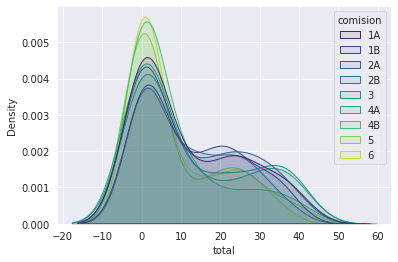

In [36]:
sns.set_style('darkgrid')

sns.kdeplot('total', data = notas,hue = 'comision' , palette = 'viridis', fill = True, alpha = .1)
# sns.kdeplot('total_avanzada', data = notas,hue = 'comision' , palette = 'viridis', fill = True, alpha = .1)

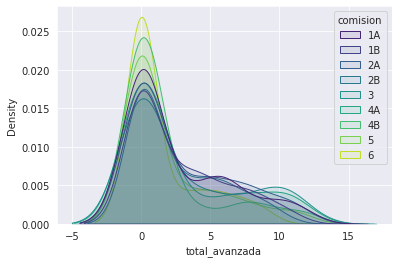

In [35]:
sns.kdeplot('total_avanzada', data = notas,hue = 'comision' , palette = 'viridis', fill = True, alpha = .1)

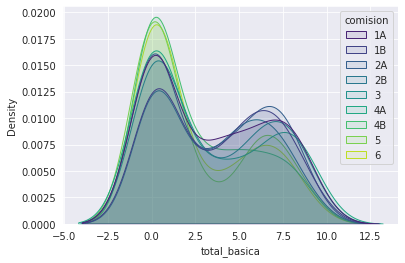

In [37]:
sns.kdeplot('total_basica', data = notas,hue = 'comision' , palette = 'viridis', fill = True, alpha = .1)